# Guided Projects: Feature Engineering - Face Feature Extraction

The face recognition system consists of a feature extraction step and classificiation step. Principal Component Analysis (PCA) is widely used in such scenarios to contruct the feature space and extract features, substantially reducing the dimensionality of the input feature vector/image. The reduced feature vector can then be used for the purpose of face Analysis.

(Project Question) Challenge:
Using PCA, create a face recognition system taht gives access to only certain people. To implement this, you can use LFW_peoples dataset provided in the scikit Library.


USE --> "min_faces_per_person" = 70 and resize = 0.4 which is 70 images should give you only 11 classes.


Given this subset of images, apply PCA to obtain the corresponsing Eigen Face for each class.
You can additionally train a classifier for recogniton purpose.

The following code is one method to approach the Challenge.
Solution by Tejaswini J.

In [1]:
#Importing the necessary libraries

import matplotlib.pyplot as plt
import numpy as np

from time import time

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [2]:
#Understanding the dataset:

#Download the Dataset
lfw_ppl = fetch_lfw_people( min_faces_per_person = 70, resize = 0.4 ) #As mentioned in the Ques.

n_samples, h, w = lfw_ppl.images.shape #Find the Shape for plotting

X = lfw_ppl.data #Input Vector
n_feat = X.shape[ 1 ]

In [3]:
#Target or Label for given data
y = lfw_ppl.target
tar_names = lfw_ppl.target_names
num_classes = tar_names.shape[ 0 ]

In [4]:
#Print to check details of dataset - for self reference
print( "Total Data Samples: ", n_samples )
print( "Size of Data: ", n_feat )
print( "Total Class Labels: ", num_classes )

Total Data Samples:  1217
Size of Data:  1850
Total Class Labels:  6


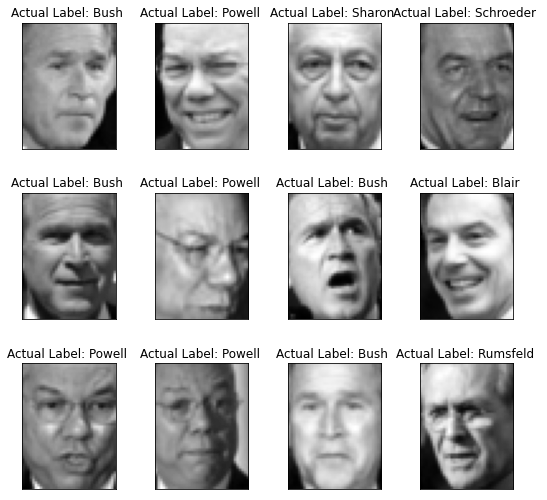

In [5]:
#Visualize the Datset
#Plot --> 3x4 Images
def plotting_Images_Dataset( img, title, h, w, titles_present = False, num_rows = 3, num_cols = 4 ): 
    
    plt.figure( figsize =( 1.8*num_cols, 2.4*num_rows ) )
    plt.subplots_adjust( bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35 )
    
    for itr in range( num_rows*num_cols ):
        plt.subplot( num_rows, num_cols, itr+1 )
        plt.imshow( img[ itr ].reshape( ( h, w ) ), cmap = plt.cm.gray )
        if titles_present == True:
            plt.title( title[ itr ], size = 12 )
        plt.xticks( () )
        plt.yticks( () )

def disp_Title( Y, targetnames, i ):
    actual_name = targetnames[ Y[i] ].rsplit( ' ', 1 )[ -1 ]
    return 'Actual Label: %s ' % ( actual_name )

titles = [ disp_Title( y, tar_names, j ) for j in range( y.shape[0] ) ]
plotting_Images_Dataset( X, titles, h , w, titles_present = True )

In [6]:
#Splitting the Data into Train and Test Sets --> 75% to Training and remaining for testing.

X_train,X_test, y_train, y_test = train_test_split( X, y, random_state = 40, test_size = 0.25 )

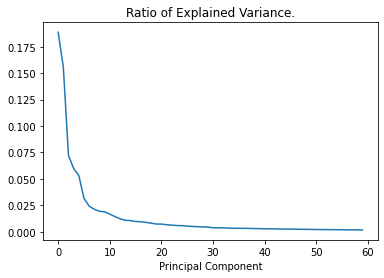

In [7]:
#Applying PCA to the given Dataset:

n_comp = 60

pca = PCA( n_components = n_comp, svd_solver = 'randomized', whiten = True )
pca.fit( X_train )

f, ax = plt.subplots()
plt.plot( pca.explained_variance_ratio_ )
plt.title( "Ratio of Explained Variance." )
ax.set_xlabel( "Principal Component" )
plt.show()

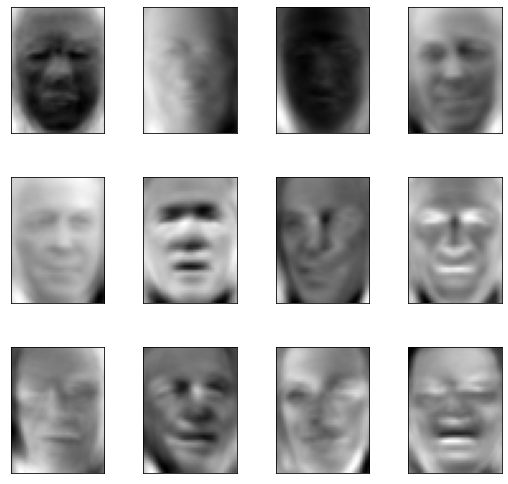

In [8]:
eig_faces = pca.components_
plotting_Images_Dataset( eig_faces, "Eigen_Faces", h, w, titles_present = False ) 

In [9]:
X_mean = pca.mean_.reshape( 1, n_feat )
X_train_pca = pca.transform( X_train )
X_test_pca = pca.transform( X_test )

In [10]:
#Fitting the Classifier to the Dataset:
par_grid = { 'C' : [ 1e3, 5e3, 1e4, 1e5 ],
             'gamma' : [ 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1 ] 
           }
clf = GridSearchCV( SVC( kernel = 'rbf', class_weight = 'balanced' ), par_grid )

clf = clf.fit( X_train_pca, y_train )
print( clf.best_estimator_ )

SVC(C=1000.0, class_weight='balanced', gamma=0.01)


In [11]:
#Predicting the People's name on Test Set
y_pred = clf.predict( X_test_pca )
print( classification_report( y_test, y_pred, target_names = tar_names ) )

print( "Confusion Matrix: \n", confusion_matrix( y_test, y_pred, labels = range( num_classes ) ) )

                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.74      0.82        19
     Colin Powell       0.93      0.86      0.89        64
  Donald Rumsfeld       0.81      0.90      0.85        29
    George W Bush       0.90      0.95      0.92       131
Gerhard Schroeder       0.81      0.81      0.81        27
       Tony Blair       0.82      0.80      0.81        35

         accuracy                           0.88       305
        macro avg       0.87      0.84      0.85       305
     weighted avg       0.88      0.88      0.88       305

Confusion Matrix: 
 [[ 14   1   3   1   0   0]
 [  0  55   2   4   0   3]
 [  0   0  26   1   2   0]
 [  1   2   1 124   1   2]
 [  0   0   0   4  22   1]
 [  0   1   0   4   2  28]]


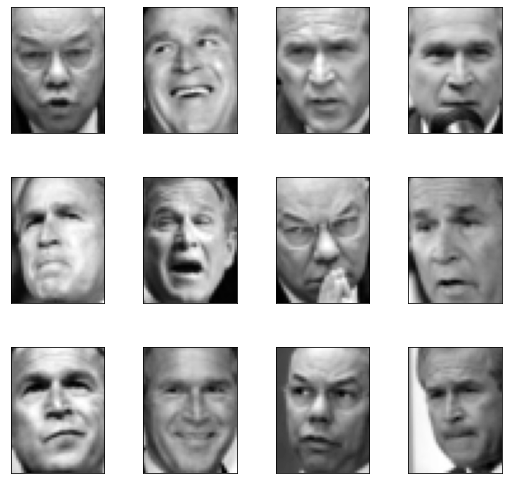

In [12]:
#Original Faces :
plotting_Images_Dataset( X_test, "Test_Data_Faces", h, w, titles_present = False ) 

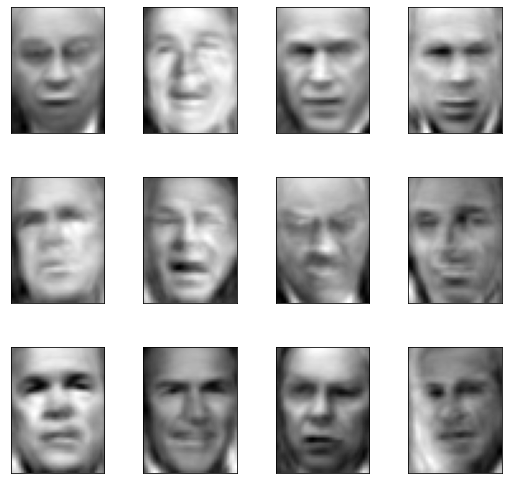

In [13]:
#Reconstructed Faces:
X_test_reconst = pca.inverse_transform( X_test_pca )
plotting_Images_Dataset( X_test_reconst, "Reconstructed_Faces", h, w, titles_present = False )